### **Project: expressEats**

***Part-1: In this Notebook we did all possible visualizations and we modelled the problem as sequence generation(receipe generation) which is a bonus!(We will explore in depth this approach in Deep Learning Course)***


***Note: We have other continued colabs, this is just part 1***

Look at our codebase below for more details

# **Phase 1: Business Understanding**
> Our objective is to develop a system that, given the total time and translated ingredients, recommends a recipe that is closest to these criteria. This can be viewed as a recommendation system problem where the input features are time and ingredients, and the output is a recipe recommendation.


In [ ]:
# Define the project goal
project_goal = "Develop a system to recommend a recipe based on total cooking time and translated ingredients."
print(project_goal)


Develop a system to recommend a recipe based on total cooking time and translated ingredients.


# **Phase 2: Data Understanding**
> Let's start by loading the dataset and performing an initial analysis to understand its structure, content, and quality. This will include looking at the number of records, features, any missing values, and the types of data we're dealing with.



In [ ]:
import pandas as pd
import joblib

# Load the dataset
file_path = '/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv'  # Replace with actual file path
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


# **Basic Statistical Summary**

In [ ]:
# Getting a basic statistical summary of the dataset
data.describe()

,Srno,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings
count,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000
mean,4902.979042,28.585213,30.832339,59.417552,5.611410
std,3479.531022,81.042007,34.019694,88.699940,26.221807
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1955.500000,10.000000,20.000000,30.000000,4.000000
50%,4304.000000,15.000000,30.000000,40.000000,4.000000
75%,7363.000000,20.000000,35.000000,55.000000,4.000000
max,14211.000000,2880.000000,900.000000,2925.000000,1000.000000


# **Check for Missing Values**

In [ ]:
# Checking for missing values
data.isnull().sum()


Srno                      0
RecipeName                0
TranslatedRecipeName      0
Ingredients               6
TranslatedIngredients     6
PrepTimeInMins            0
CookTimeInMins            0
TotalTimeInMins           0
Servings                  0
Cuisine                   0
Course                    0
Diet                      0
Instructions              0
TranslatedInstructions    0
URL                       0
dtype: int64

# **Understanding Data Types and Columns**

In [ ]:
# Understanding data types and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Srno                    6871 non-null   int64 
 1   RecipeName              6871 non-null   object
 2   TranslatedRecipeName    6871 non-null   object
 3   Ingredients             6865 non-null   object
 4   TranslatedIngredients   6865 non-null   object
 5   PrepTimeInMins          6871 non-null   int64 
 6   CookTimeInMins          6871 non-null   int64 
 7   TotalTimeInMins         6871 non-null   int64 
 8   Servings                6871 non-null   int64 
 9   Cuisine                 6871 non-null   object
 10  Course                  6871 non-null   object
 11  Diet                    6871 non-null   object
 12  Instructions            6871 non-null   object
 13  TranslatedInstructions  6871 non-null   object
 14  URL                     6871 non-null   object
dtypes: i

# **Exploring Unique Values in Categorical Columns**

In [ ]:
# Example for 'Cuisine' column
data['Cuisine'].value_counts()

Cuisine
Indian                  1157
Continental             1021
North Indian Recipes     938
South Indian Recipes     682
Italian Recipes          236
                        ... 
Jewish                     1
Dessert                    1
Side Dish                  1
Shandong                   1
Lunch                      1
Name: count, Length: 82, dtype: int64

# **Auto EDA**

In [ ]:
!pip install sweetviz

  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 53.7 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


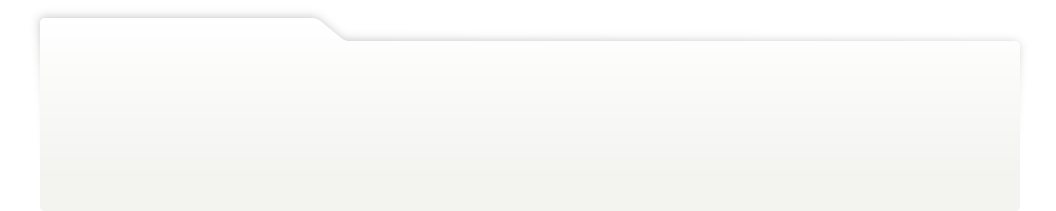
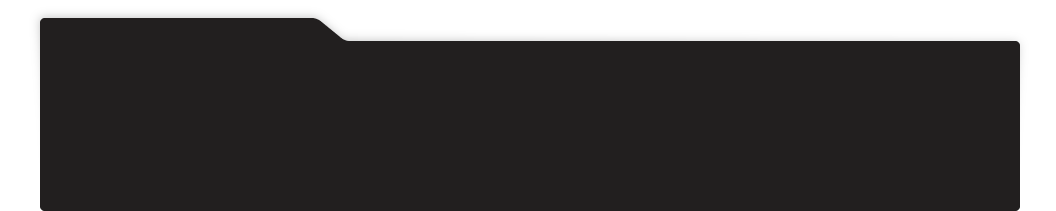
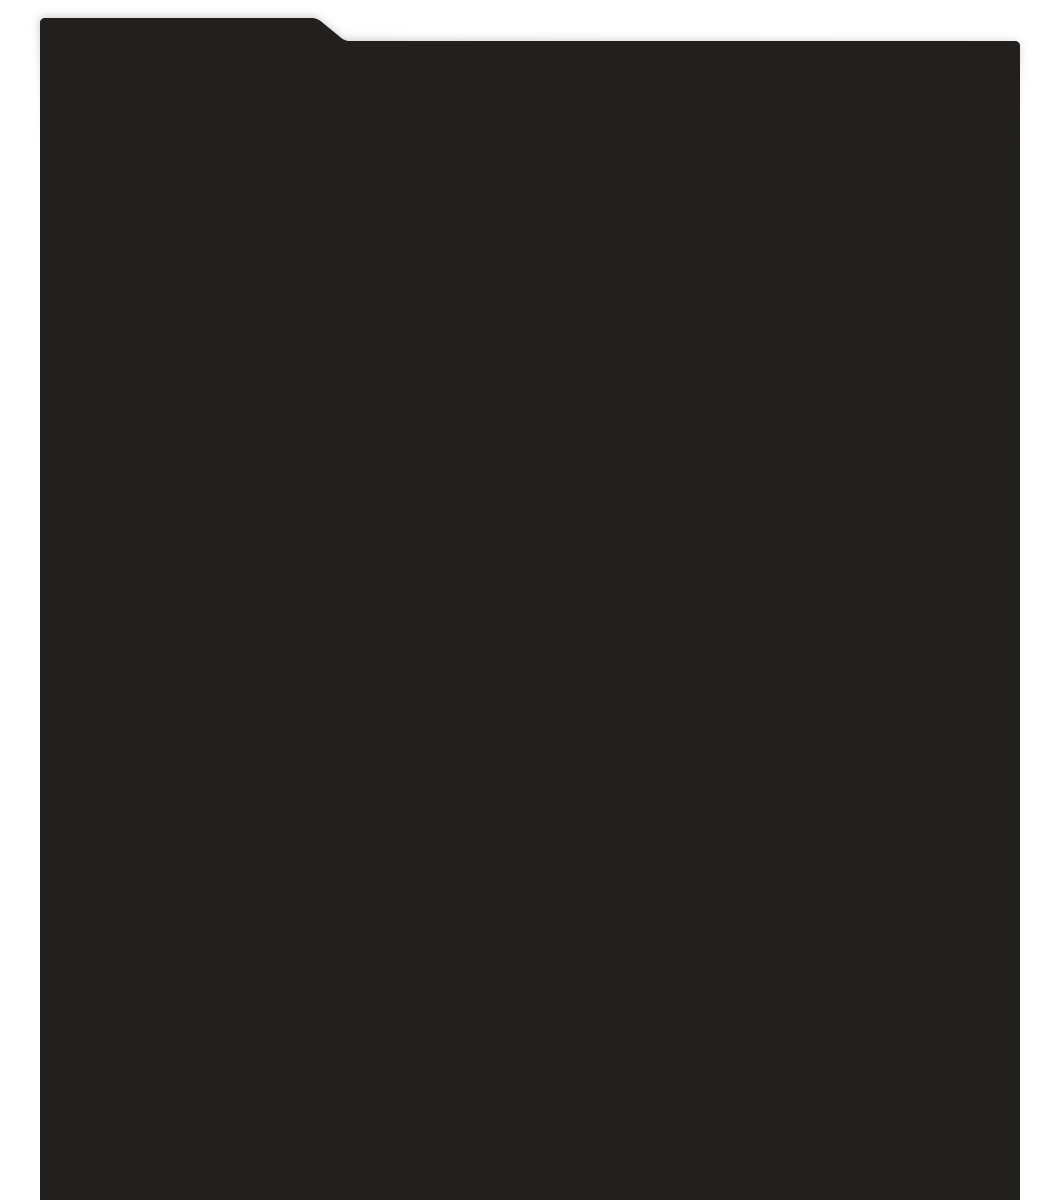
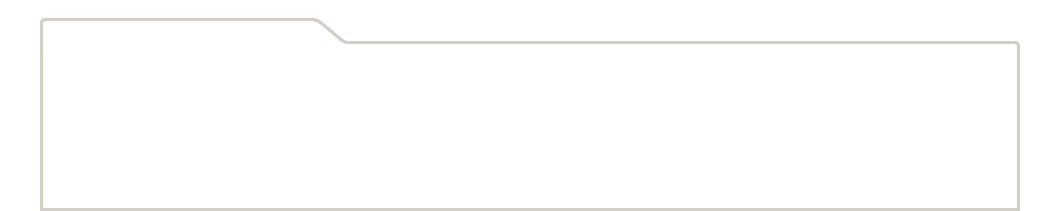
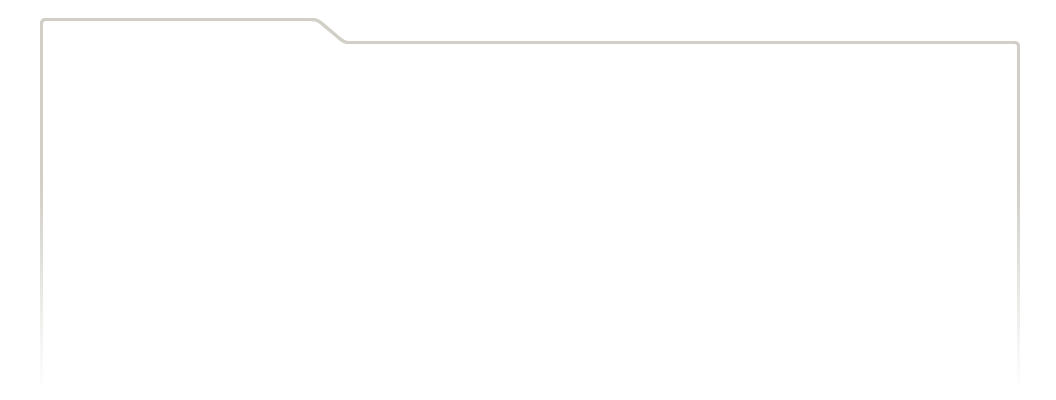
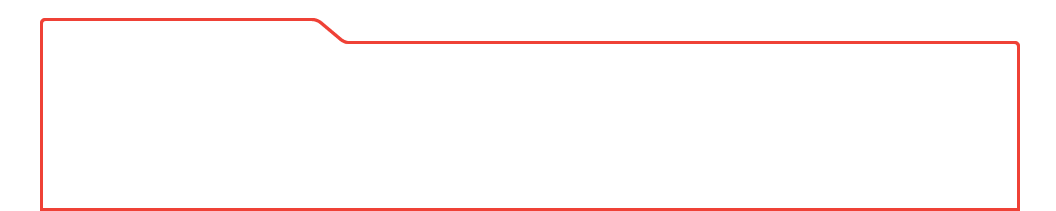
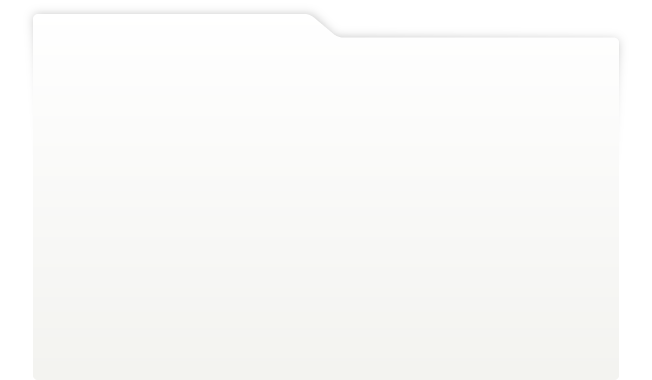
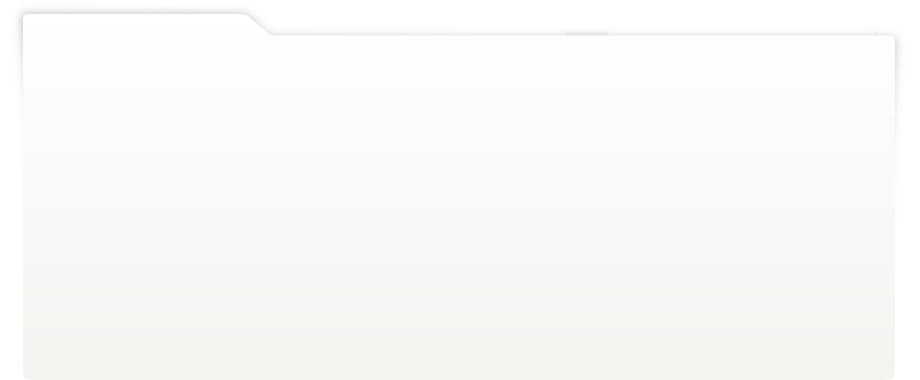
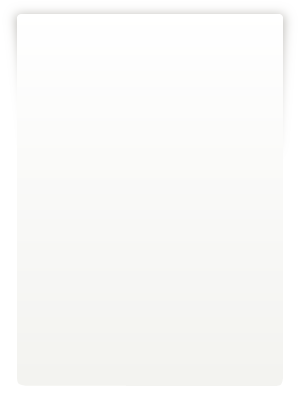
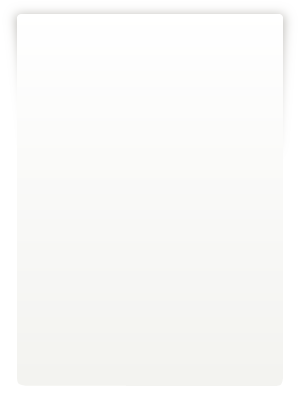
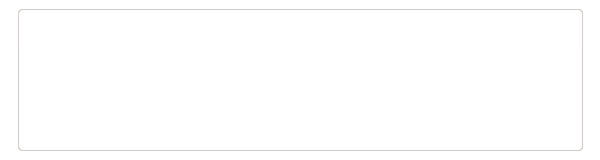
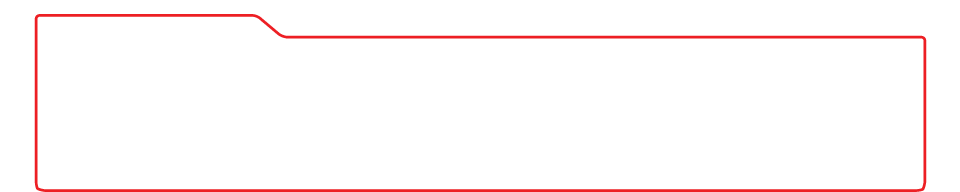
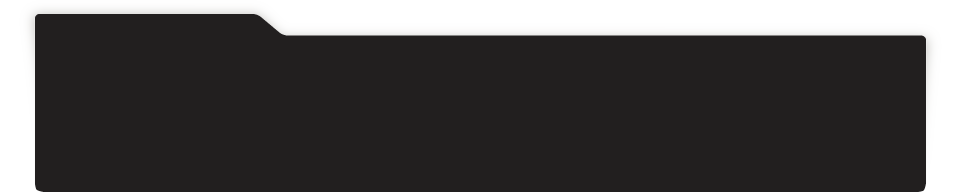
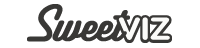
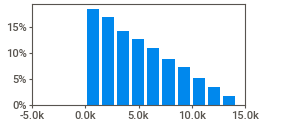
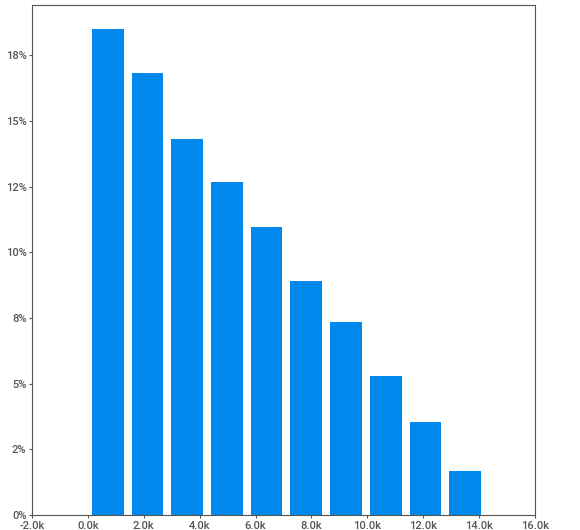
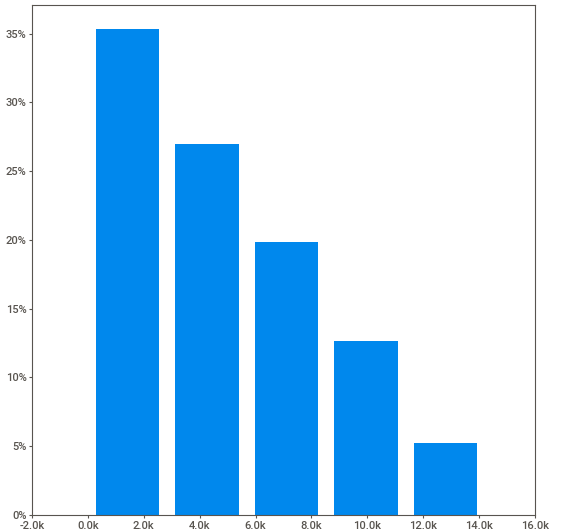
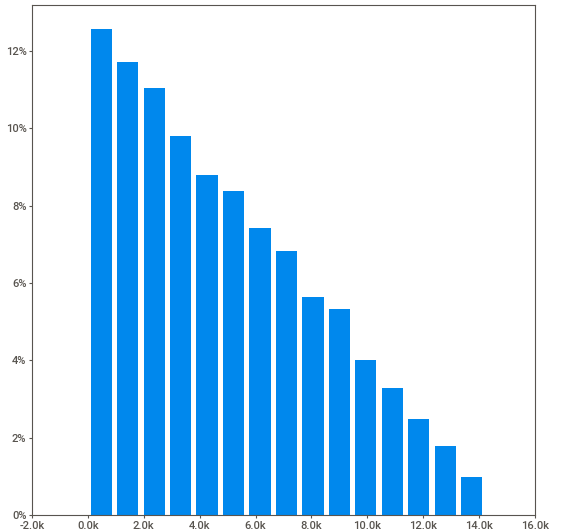
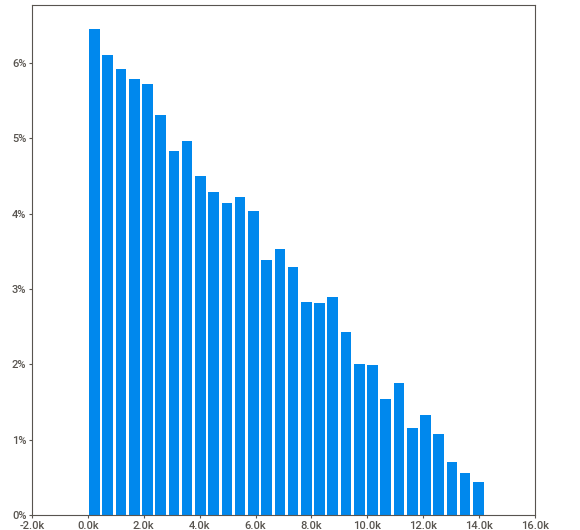
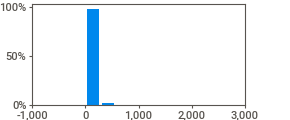
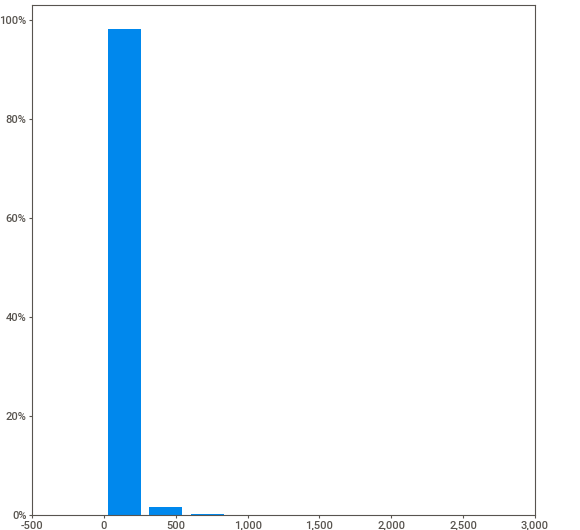
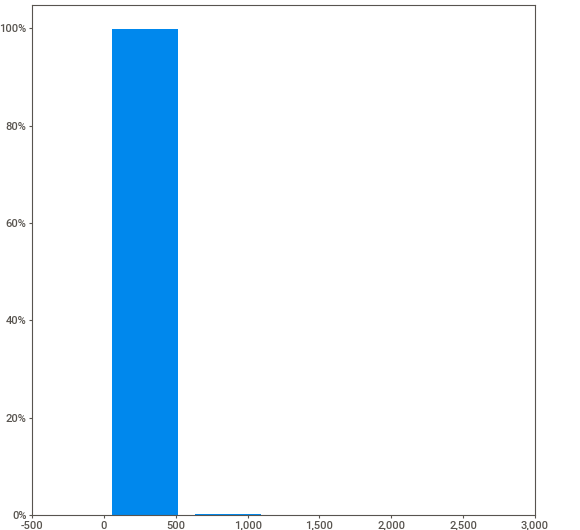
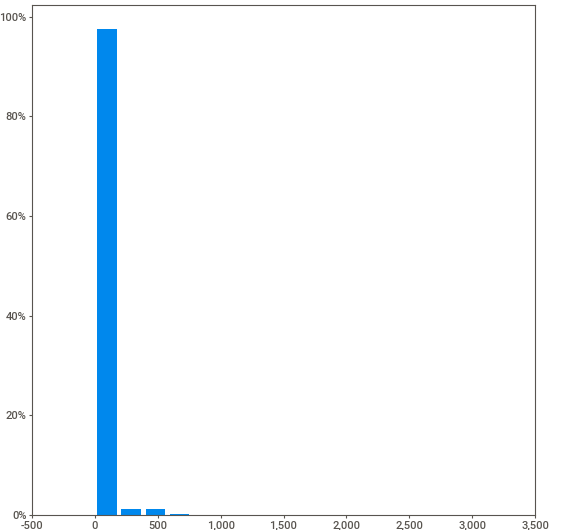
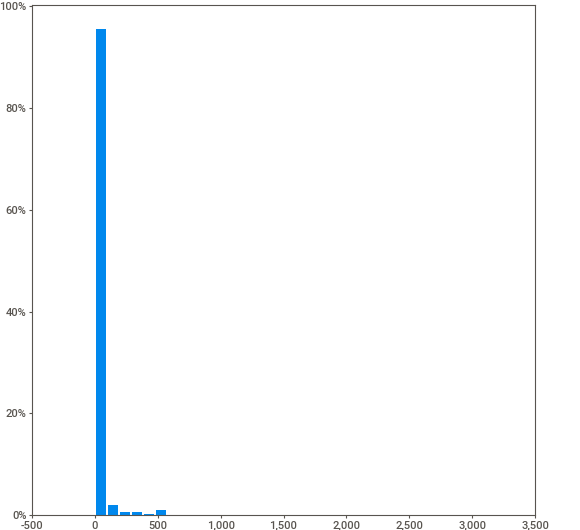
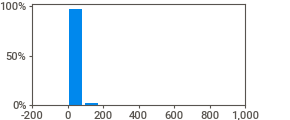
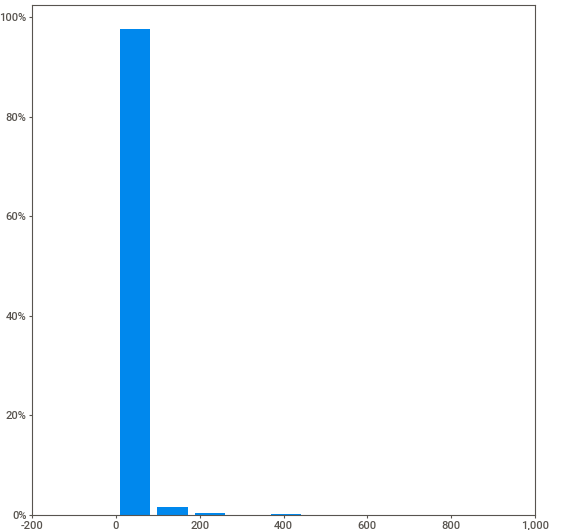
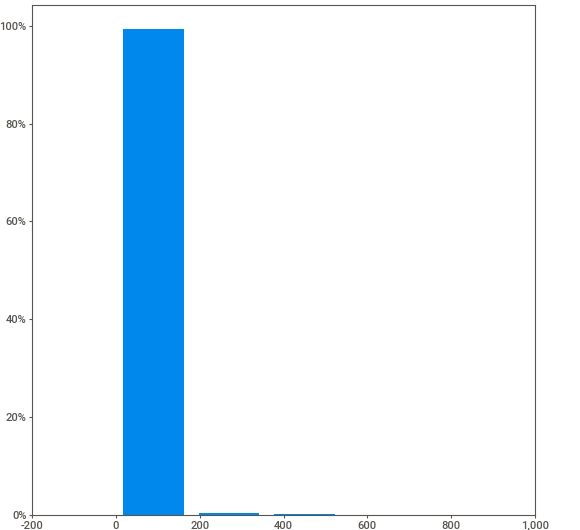
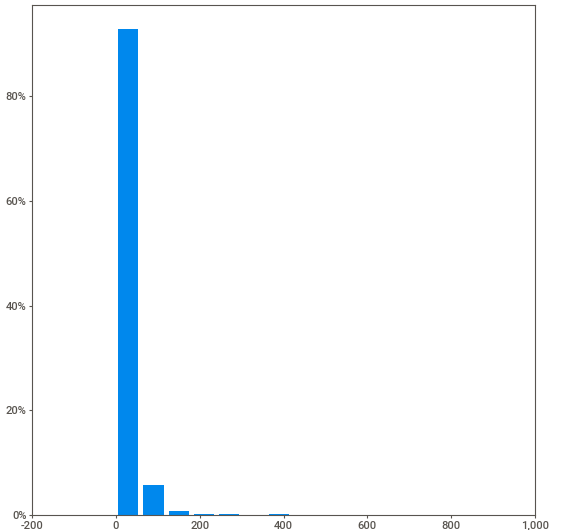
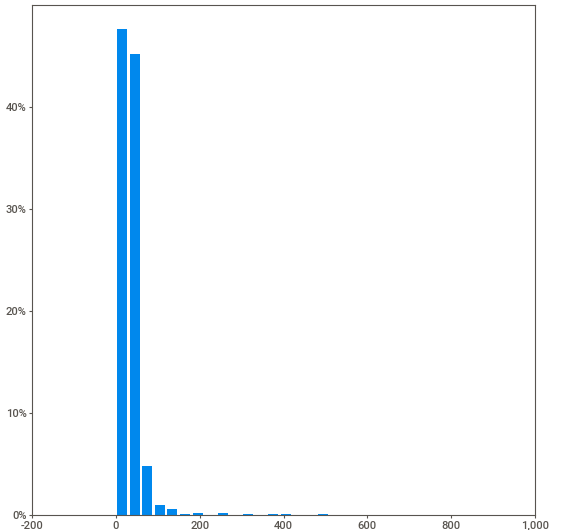
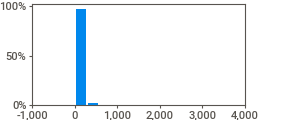
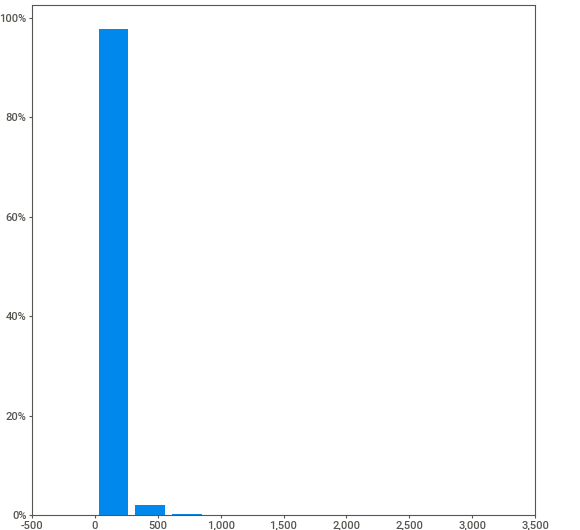
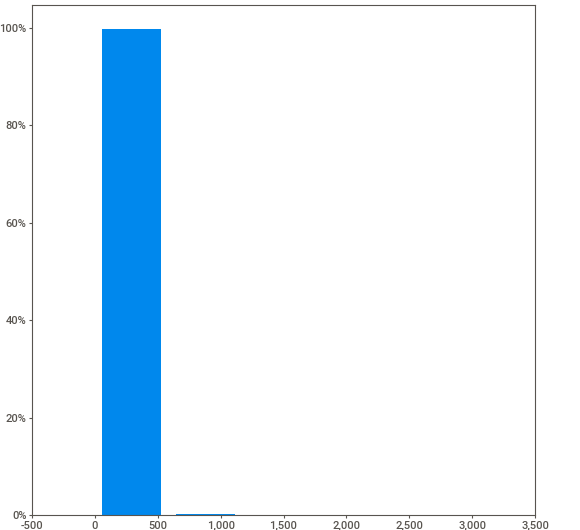
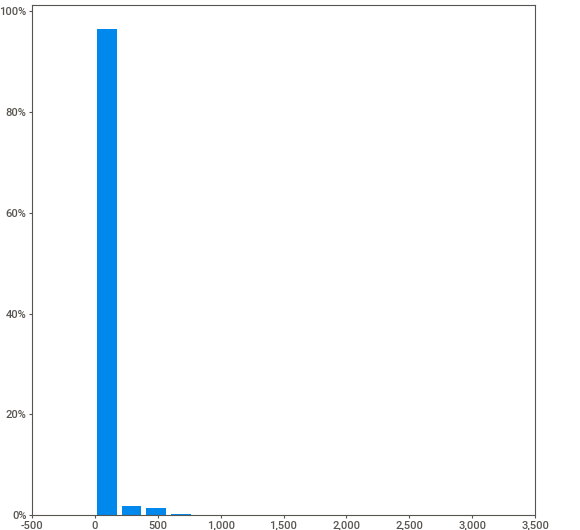
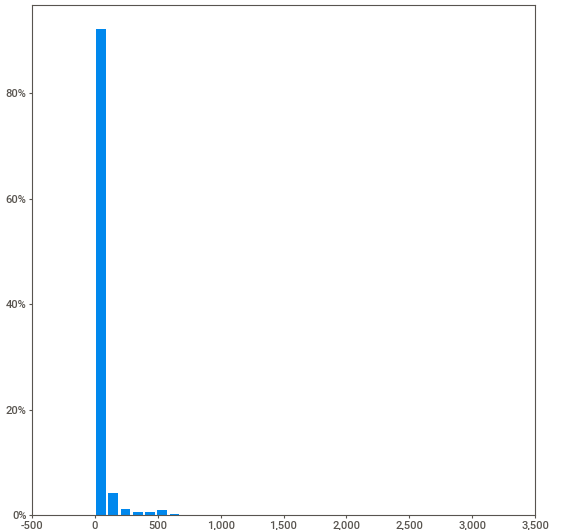
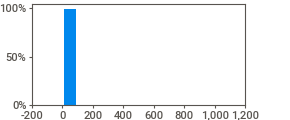
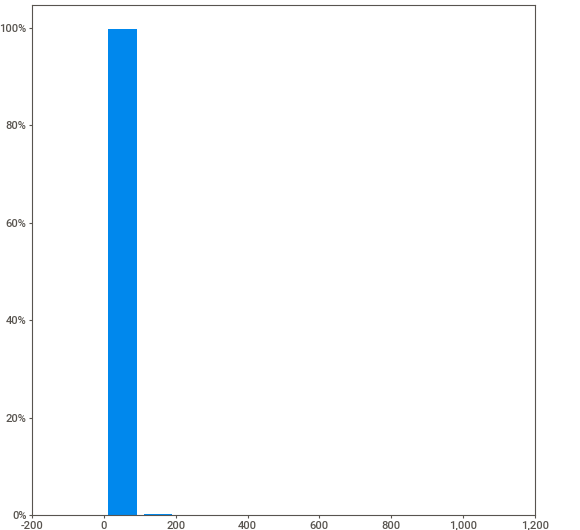
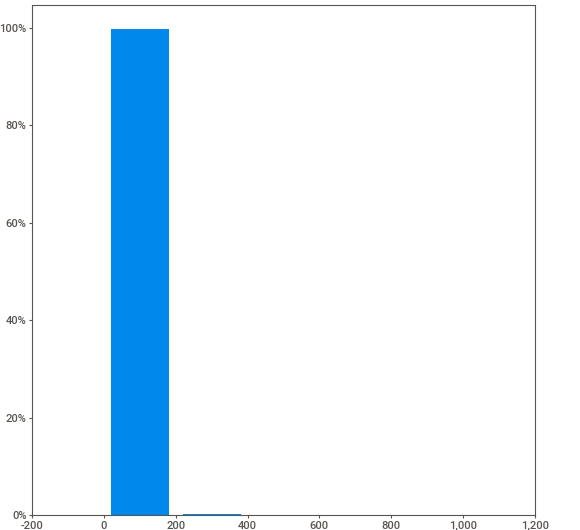
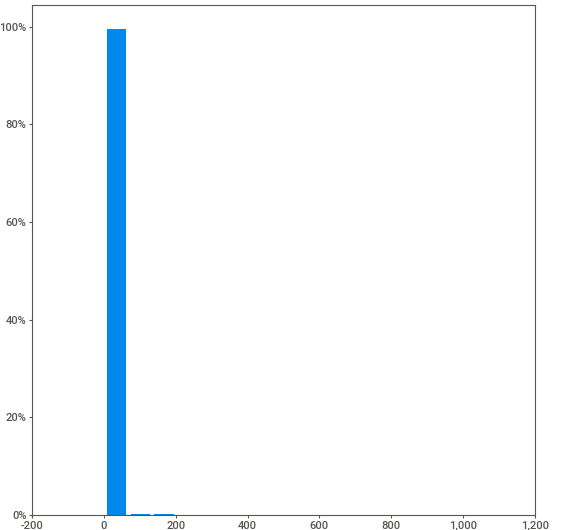
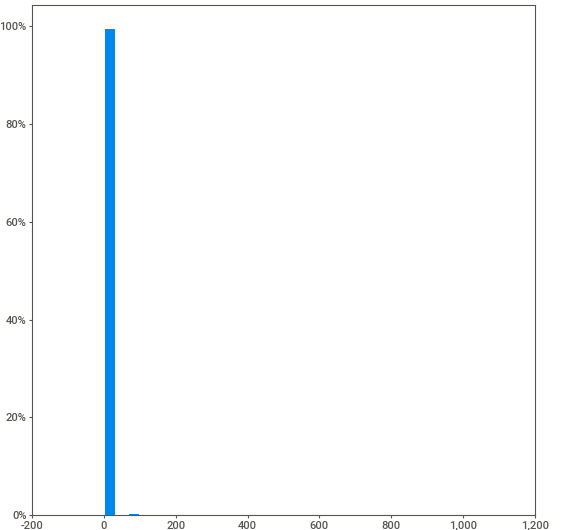
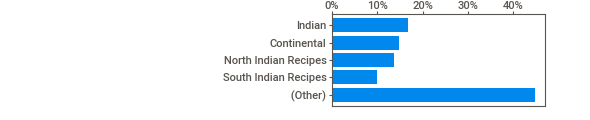
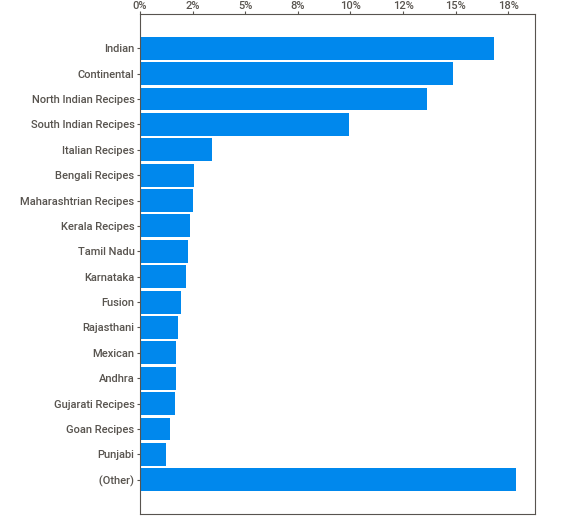
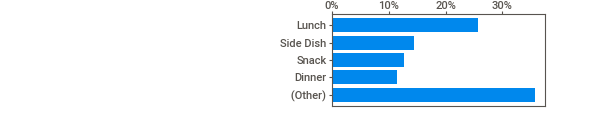
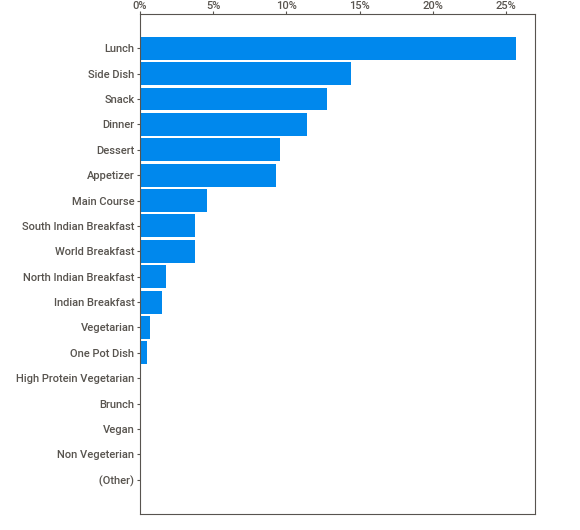
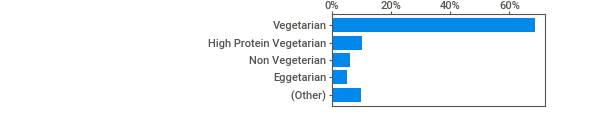
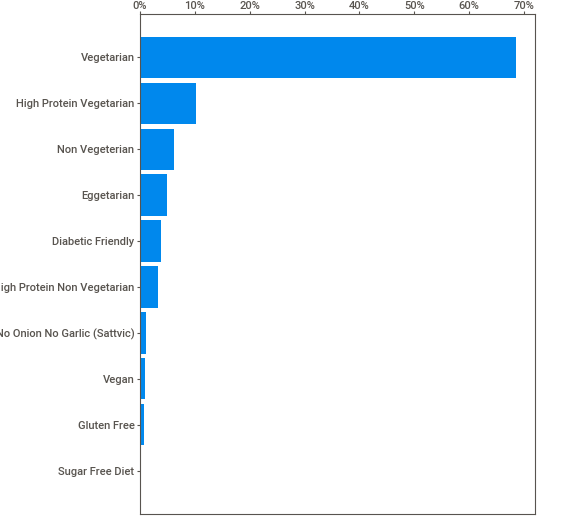
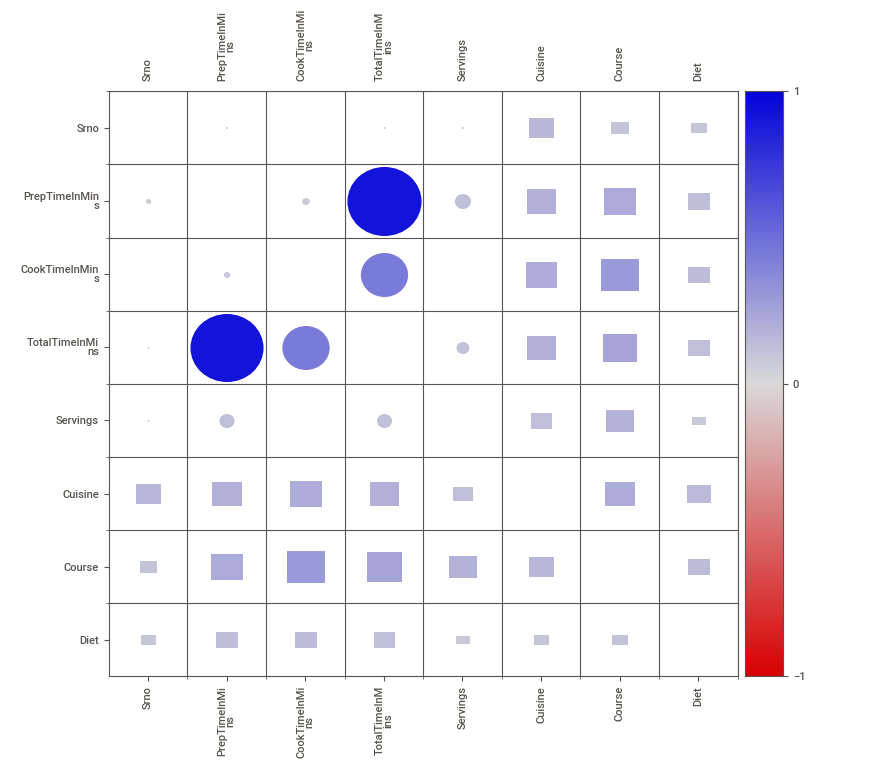
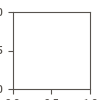

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import sweetviz as sv


# Analyze the dataset
report = sv.analyze(data)

# Show the report in a Jupyter Notebook (if you're using one)
report.show_notebook()

# Or save the report to an HTML file
report.show_html('Sweetviz_Report.html')


# **Phase 3: Data Preparation**
> This phase involves preparing the dataset for modeling. Since our goal is to recommend a recipe based on total time and translated ingredients, we'll focus on these aspects.

# **Handle Missing Values**

In [ ]:
# Dropping rows where 'TranslatedIngredients' or 'TotalTimeInMins' are missing
data_cleaned = data.dropna(subset=['TranslatedIngredients', 'TotalTimeInMins'])

# **Feature Engineering**

In [ ]:
# Counting the number of ingredients in each recipe
data_cleaned['IngredientsCount'] = data_cleaned['TranslatedIngredients'].apply(lambda x: len(x.split(',')))

/tmp/ipykernel_19/2568196131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['IngredientsCount'] = data_cleaned['TranslatedIngredients'].apply(lambda x: len(x.split(',')))


# **Feature Selection**

In [ ]:
# Selecting relevant features
features = data_cleaned[['TotalTimeInMins', 'TranslatedIngredients', 'IngredientsCount']]

# **Splitting the Data**

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
data.dropna(subset=['TotalTimeInMins', 'TranslatedIngredients', 'TranslatedRecipeName'], inplace=True)

# Vectorize the ingredients
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['TranslatedIngredients'])
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
# Normalize TotalTimeInMins
max_time = data['TotalTimeInMins'].max()
normalized_time = data['TotalTimeInMins'] / max_time

# Combine time with ingredient vectors
features = np.hstack([tfidf_matrix.toarray(), normalized_time.values[:, np.newaxis]])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, data['TranslatedRecipeName'], test_size=0.2, random_state=42)



# **Phase 4: Modeling**
We'll create functions to:

Train Models: Train different regression models.

Inference: Predict using the models.

Evaluation: Use various metrics to evaluate model performance.

Saving Models: Save each trained model and its vectorizer.

# **KNN Training**

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

import joblib
# Combine TF-IDF features with normalized time
# Ensure both are numpy arrays and reshape the normalized time to match dimensions
# Ensure normalized_time is a NumPy array
normalized_time_array = normalized_time.values.reshape(-1, 1)

# Combine TF-IDF features with normalized time
combined_features = np.hstack([tfidf_matrix.toarray(), normalized_time_array])


# Use NearestNeighbors for retrieval
knn_retriever = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_retriever.fit(combined_features)

# Saving the model
joblib.dump(knn_retriever, 'knn_retriever_model.pkl')


['knn_retriever_model.pkl']

# **KNN Inference**

In [ ]:
def make_recommendations(input_ingredients, input_time, model, tfidf_vectorizer, data, num_recommendations=5):
    # Process the input
    input_vector = tfidf_vectorizer.transform([input_ingredients])

    # Convert and reshape normalized time
    normalized_time = np.array([input_time / max_time]).reshape(-1, 1)
    input_features = np.hstack([input_vector.toarray(), normalized_time])

    # Find nearest recipes
    distances, indices = model.kneighbors(input_features)

    # Get recommended recipe names
    recommended_recipes = data.iloc[indices[0]]['TranslatedRecipeName']
    return recommended_recipes


In [ ]:
# Example input
input_ingredients = "1 cup rice, 2 tomatoes, 1 tsp salt"
input_time = 30  # in minutes

# Load models and vectorizer
knn_retriever = joblib.load('knn_retriever_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Get recommendations
recommendations = make_recommendations(input_ingredients, input_time, knn_retriever, tfidf_vectorizer, data)
print(recommendations)


607                   Madurai Spicy Tomato Chutney Recipe
5388      Potato Bonda Recipe - Low Fat Aloo Bonda Recipe
5432                                  Patiala Aloo Recipe
413           Mullu Murukku Recipe - Mullu Murukku Recipe
1038    Tomato Onion Chutney Recipe - Tomato Onion Chu...
Name: TranslatedRecipeName, dtype: object


# **KNN All possible Metrics!!**

Precision@k: The proportion of recommended items in the top-k set that are relevant.

Recall@k: The proportion of relevant items found in the top-k recommendations.

F1 Score@k: The harmonic mean of precision and recall at k.

Mean Reciprocal Rank (MRR): The average of the reciprocal ranks of the first relevant recommendation.

Coverage: The proportion of items in the dataset for which the recommender can provide recommendations.

In [ ]:
def precision_recall_at_k(query_index, recommendations_indices, k=5):
    # Assuming relevant items are those that are most similar to the query
    relevant_indices = set(indices[query_index][:k + 1])  # +1 to exclude the query itself
    recommended_indices = set(recommendations_indices)

    true_positives = len(relevant_indices.intersection(recommended_indices))
    precision = true_positives / len(recommended_indices)
    recall = true_positives / len(relevant_indices)

    return precision, recall

In [ ]:
def f1_score_at_k(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)


In [ ]:
def mean_reciprocal_rank(indices, recommendations_indices_list):
    mrr = 0
    for query_index, recommendations_indices in enumerate(recommendations_indices_list):
        for rank, index in enumerate(recommendations_indices, start=1):
            if index in indices[query_index]:
                mrr += 1 / rank
                break
    return mrr / len(recommendations_indices_list)


In [ ]:
def coverage(recommendations_indices_list, total_items):
    unique_recommendations = set(item for sublist in recommendations_indices_list for item in sublist)
    return len(unique_recommendations) / total_items


In [ ]:
# Assumption: Top 5 similar recipes are relevant for each recipe
indices = knn_retriever.kneighbors(combined_features, n_neighbors=6, return_distance=False)

precisions = []
recalls = []
f1_scores = []
recommendations_indices_list = []

for query_index in range(len(data)):
    # Getting recommendations (excluding the query itself)
    recommendations_indices = indices[query_index][1:]
    recommendations_indices_list.append(recommendations_indices)

    precision, recall = precision_recall_at_k(query_index, recommendations_indices)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score_at_k(precision, recall))

# Calculating average metrics
average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1_score = sum(f1_scores) / len(f1_scores)

# MRR and Coverage
mrr = mean_reciprocal_rank(indices, recommendations_indices_list)
cov = coverage(recommendations_indices_list, len(data))

# Print metrics
print(f"Average Precision@5: {average_precision}")
print(f"Average Recall@5: {average_recall}")
print(f"Average F1 Score@5: {average_f1_score}")
print(f"Mean Reciprocal Rank: {mrr}")
print(f"Coverage: {cov}")

Average Precision@5: 1.0
Average Recall@5: 0.8333333333332906
Average F1 Score@5: 0.9090909090909766
Mean Reciprocal Rank: 1.0
Coverage: 0.8665695557174071
